In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os


print(os.getcwd()) # Ensure the current working directory is set correctly

# Load the CSV file
csv_file = "../../data/diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(csv_file, sep=',')


print(data.info())
data = data.drop_duplicates()
print(data.info())


/home/laureal/Documents/Tsp/NET-4550/codes/PreProcessing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64


In [3]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE sur les variables d'entraînement
smote = SMOTE(random_state=42)
data_resampled, y_resampled = smote.fit_resample(data.drop(columns="Diabetes_012"), data["Diabetes_012"])

data_resampled["Diabetes_012"] = y_resampled

print("Distribution après SMOTE :")
print(data_resampled.value_counts())



Distribution après SMOTE :
HighBP  HighChol  CholCheck  BMI   Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age   Education  Income  Diabetes_012
1.0     1.0       1.0        98.0  1.0     1.0     1.0                   0.0           1.0     1.0      0.0                1.0            0.0          4.0      15.0      10.0      1.0       0.0  11.0  5.0        6.0     2.0             1
0.0     0.0       0.0        14.0  1.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          3.0      4.0       4.0       0.0       1.0  11.0  6.0        8.0     0.0             1
                             15.0  0.0     0.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      0.0       0.0       0.0       0.0  1.0   5.0        7.0     0.0             1
                          

<Axes: >

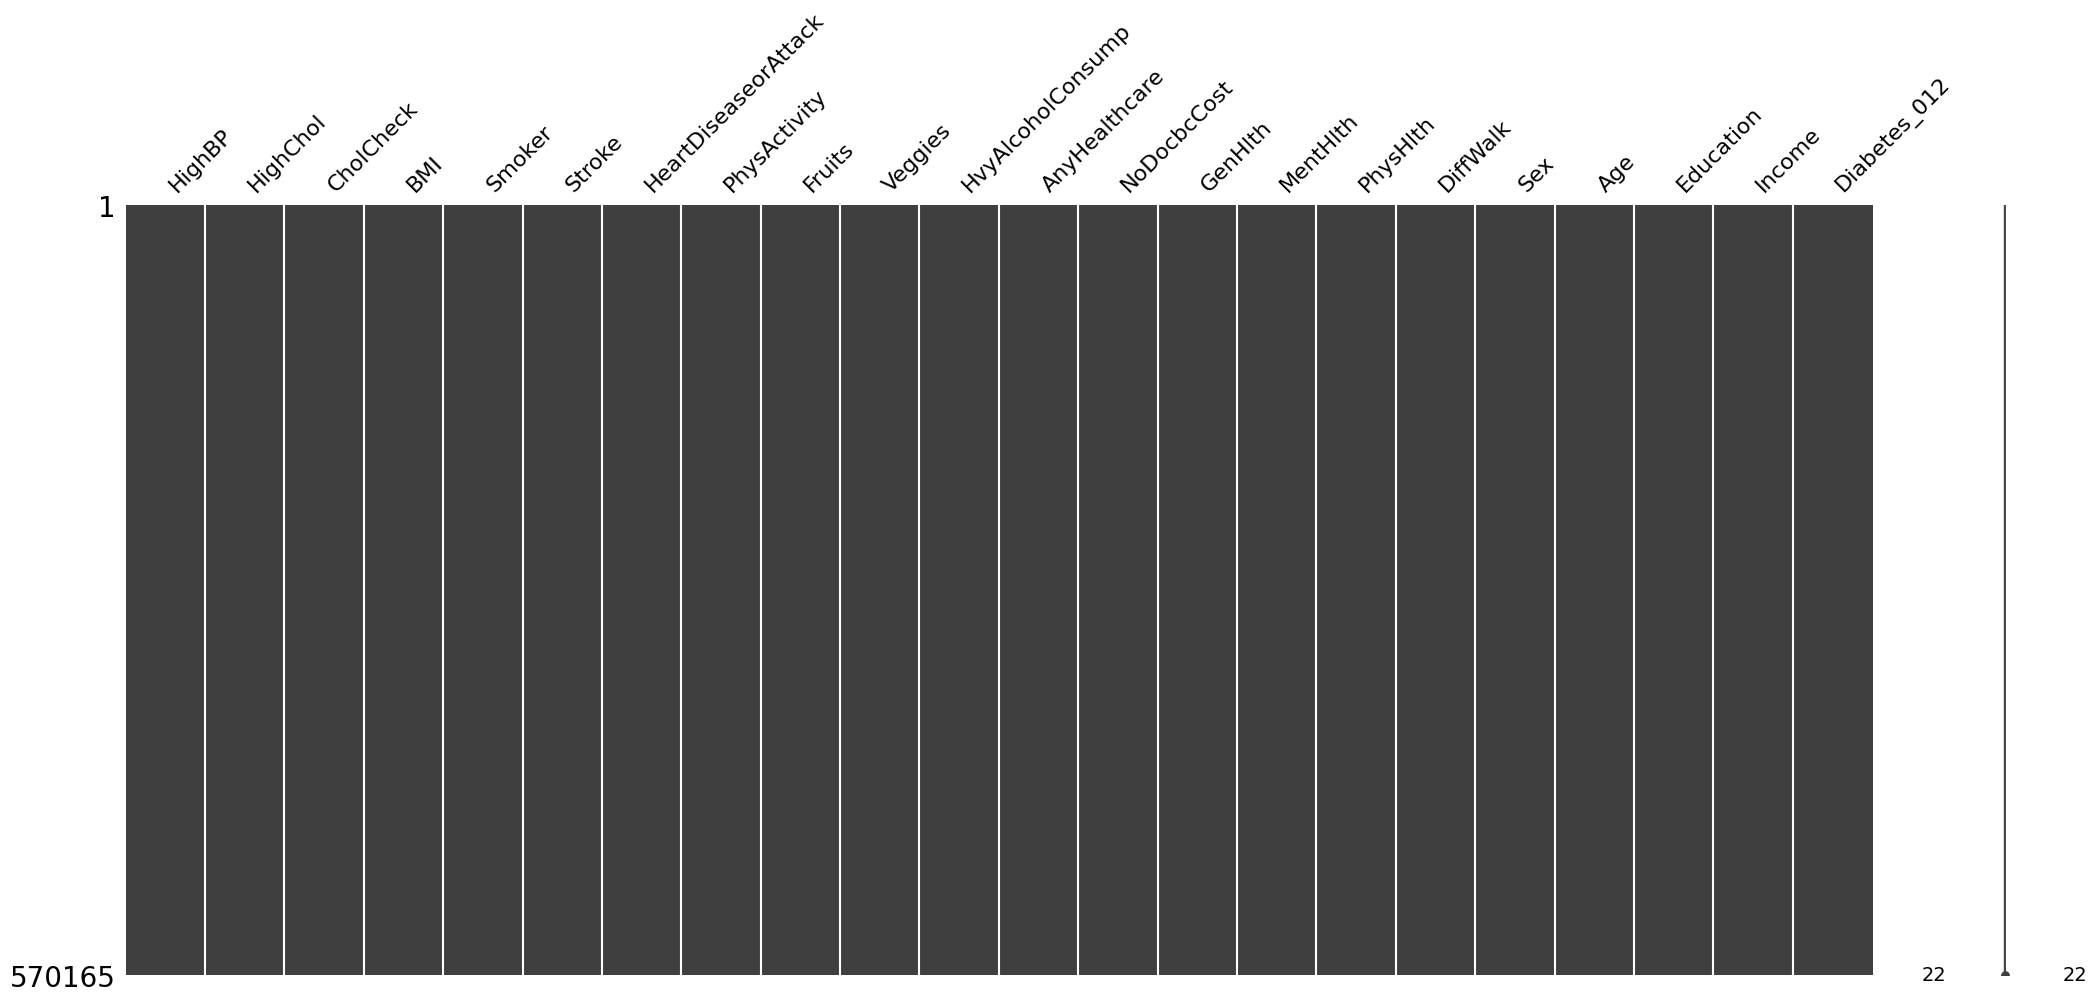

In [4]:
import missingno as msno
msno.matrix(data_resampled)


Pas besoin de logarithme, comme nous avons pu le voir dans la datavisualization nous n'avons pas de données le nécessitant au vu de leur distribution.
Pas besoin d'encodage catégoriel, toutes les données sont déjà encodées correctement par leurs valeurs (0 ou 1 généralement)
Meme les valeurs catégorielles non booleennes sont classées de maniere hierarchique par leurs chiffres.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

binary_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_012'
]

features_to_scale = [col for col in data_resampled.columns if col not in binary_features]

data_resampled[features_to_scale] = scaler.fit_transform(data_resampled.drop(columns=binary_features))


In [6]:
# # Separate features and target
X = data_resampled.drop('Diabetes_012', axis=1)
y = data_resampled['Diabetes_012']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.decomposition import PCA

# Ajuster la PCA sans fixer n_components pour tout calculer
pca = PCA()
pca.fit(train_X)

# Calculer la variance expliquée cumulée
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Trouver le nombre de composantes pour atteindre 90% de variance
import numpy as np
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Nombre de composantes à garder pour 90% de variance : {n_components}")

print("Nombre de composantes à l'origine " + str(len(train_X.columns)))


Nombre de composantes à garder pour 90% de variance : 11
Nombre de composantes à l'origine 21


In [7]:
pca = PCA(n_components=11)
data_reduced_train = pca.fit_transform(train_X)
data_reduced_test = pca.fit_transform(test_X)

In [9]:
# Convert numpy arrays to DataFrames
data_reduced_train = pd.DataFrame(data_reduced_train)
data_reduced_test = pd.DataFrame(data_reduced_test)
test_y = pd.DataFrame(test_y)
train_y = pd.DataFrame(train_y)


# Enregistrer le dataset prétraité
data_reduced_train.to_csv("../../data/data_preprocessed/data_resampled_Xtrain.csv", index=False)
data_reduced_test.to_csv("../../data/data_preprocessed/data_resampled_Xtest.csv", index=False)

test_y.to_csv("../../data/data_preprocessed/data_resampled_ytest.csv", index=False)
train_y.to_csv("../../data/data_preprocessed/data_resampled_ytrain.csv", index=False)

